# Data Preprocessing 

In [ ]:
import pandas as pd 
data=pd.read_csv("CC GENERAL.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)
data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(),inplace=True)
data=data.drop(["CUST_ID"],axis=1)

*drop CUST_ID as it s not needed  

In [ ]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Scaling the data**

we scale the date because we have large range of values of  features  it helps to normalise the data within a particular range for a better comparison

In [ ]:

from scipy.stats import zscore
data_scaled=data.apply(zscore)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# Hierarchichal Clustering

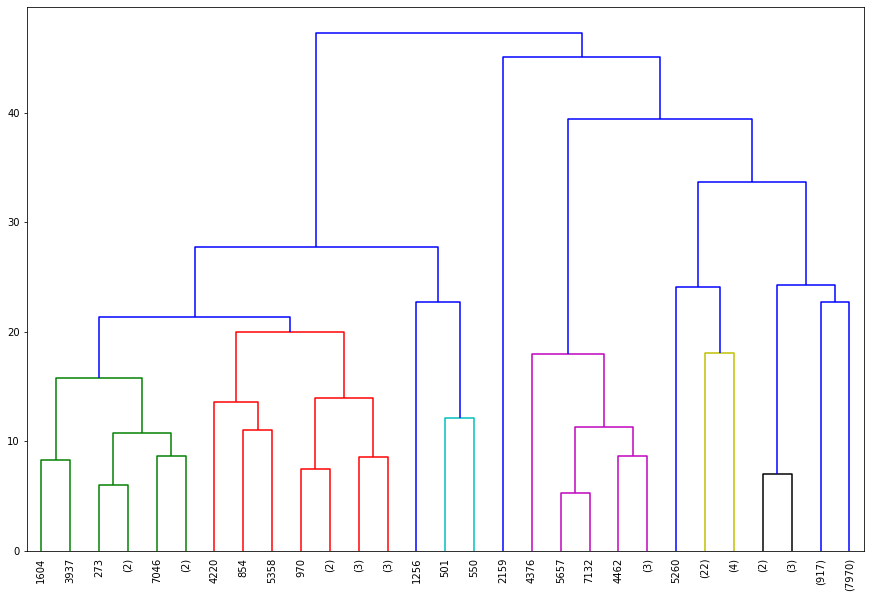

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
import matplotlib.pyplot as plt
 
Z=linkage(data_scaled,method="complete")
plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.show()

*If we draw a horizontal line that passes through longest distance(cycle de vie le plus grand d'un cluster ), It intersects 4 vertical lines
So, Optimal cluster = 4

In [ ]:
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")
model.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [ ]:
data_hierarchical=pd.concat([data, pd.DataFrame({'cluster':model.labels_})], axis=1)
data_hierarchical.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
data_hierarchical.groupby('cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1551.041741,0.876957,934.367870,536.672224,397.996871,972.024929,0.489207,0.200951,0.363372,0.135296,3.237807,14.411705,4461.545306,1660.523001,818.604357,0.152873,11.515865
1,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
2,10905.053810,1.000000,431.930000,133.500000,298.430000,47137.211760,0.583333,0.250000,0.500000,1.000000,123.000000,21.000000,19600.000000,39048.597620,5394.173671,0.000000,12.000000
3,6674.080781,1.000000,1714.498571,0.000000,1714.498571,1008.546231,0.571429,0.000000,0.571429,0.059524,2.285714,34.142857,6457.142857,2169.653661,52620.432990,0.000000,12.000000


Cluster 0 : 
Low balance but the balance gets updated frequently the purchase is quite high and they rarely  pay cash in advance.

Cluster 1 :
 high balance and  the balance  gets updated frequently  Number of purchase transactions made is high and they almost never pay cash in advance , PURCHASES_FREQUENCY is high they tend to spend a lot  

Cluster 2 : 
Balance is very high and it gets updated very frequently but the amount of purchases are comparitively low and almost all the purchases are done with cash in advance. they have the highest credit limit (the richest ) 

Cluster 3 :
Balance is very high and it gets updated very frequently as well they have nearly the same behavour as the population in cluster 2

**PCA**


*We apply PCA to transform data to 2 dimensions for visualization. We won't be able to visualize the data in 18 dimensions so we reduce the dimensions with PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()


,principal component 1,principal component 2
0,-1.682218,-1.076448
1,-1.138293,2.506462
2,0.969675,-0.383525
3,-0.873629,0.043157
4,-1.599431,-0.688572


In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':model.labels_})], axis = 1)
finalDf.head(2)

,principal component 1,principal component 2,cluster
0,-1.682218,-1.076448,0
1,-1.138293,2.506462,0


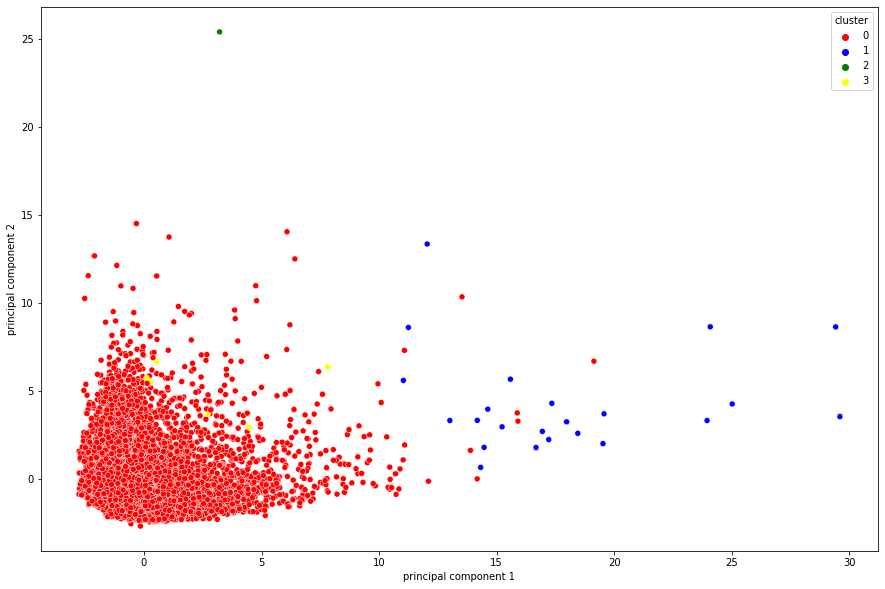

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green','yellow'])
plt.show()

# K-means

**Elbow methode** 

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

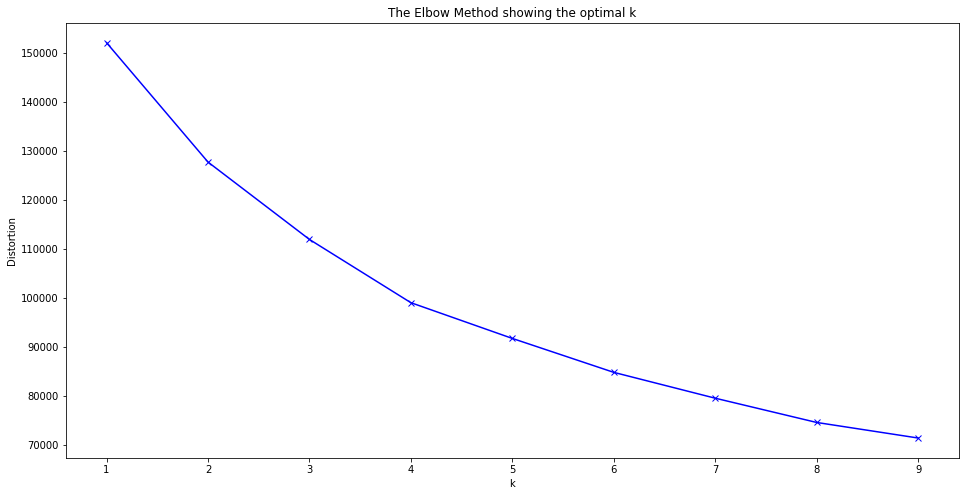

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()       

* after k=4 , the cluster errors are almost similar and  the slope of the line is almot constant as well
(k=4)



In [ ]:
kmean= KMeans(4)
kmean.fit(data_scaled)
labels=kmean.labels_
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


**Viz**


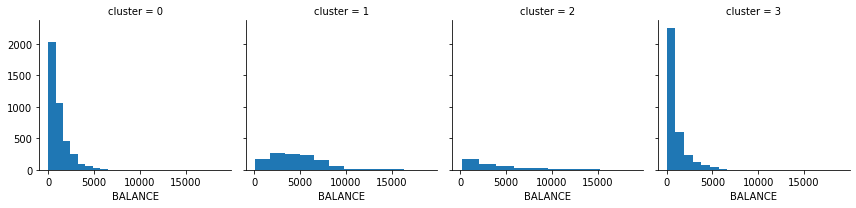

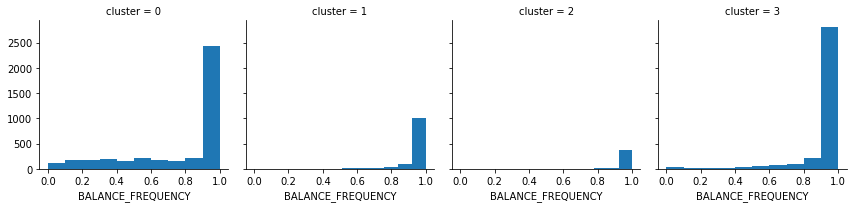

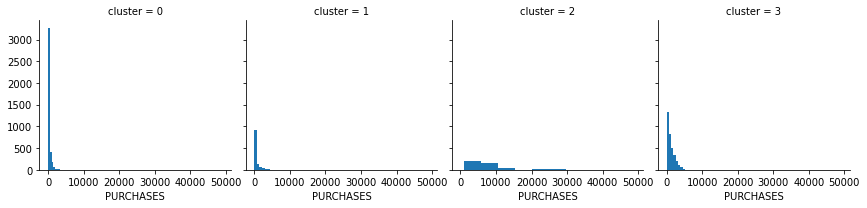

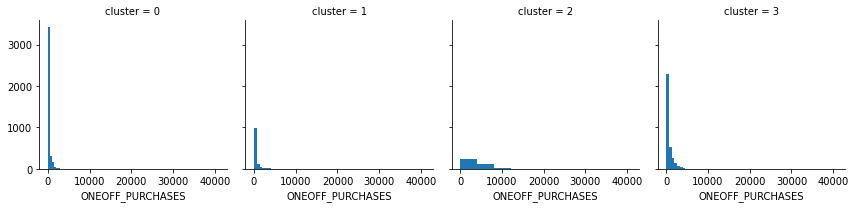

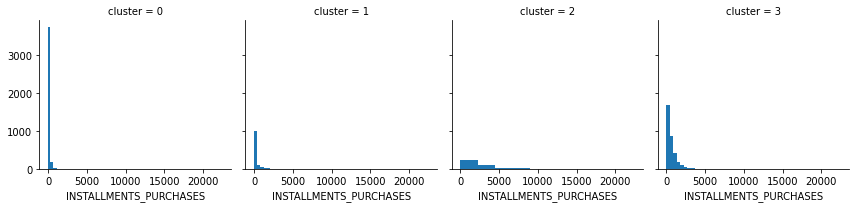

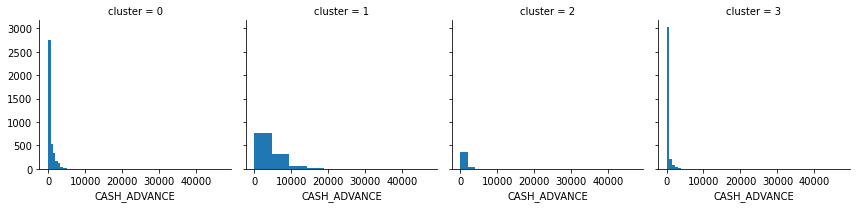

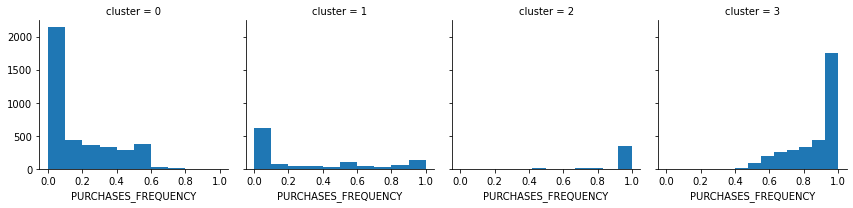

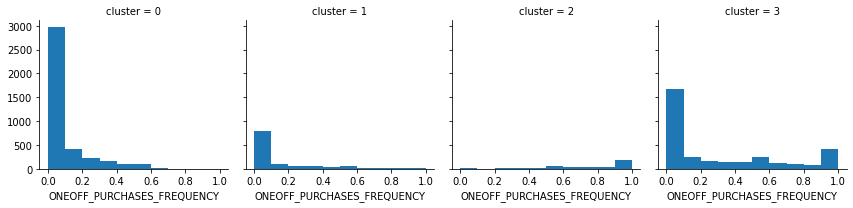

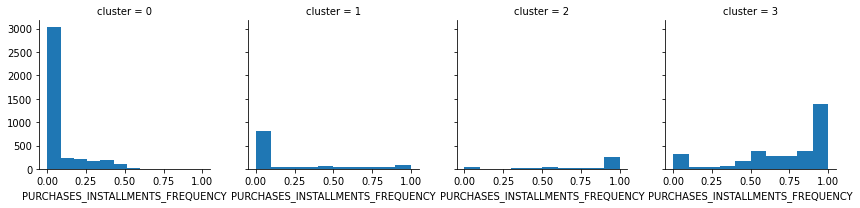

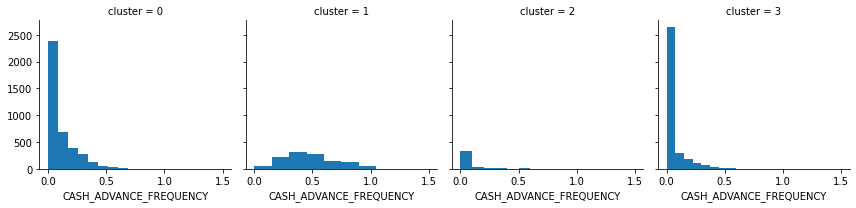

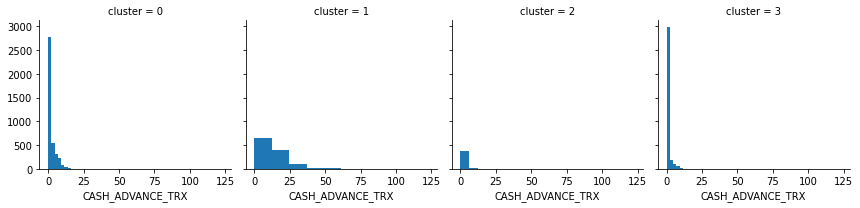

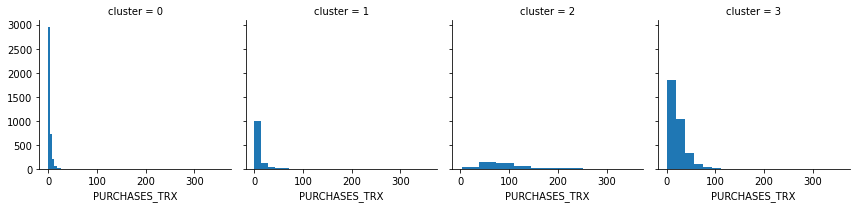

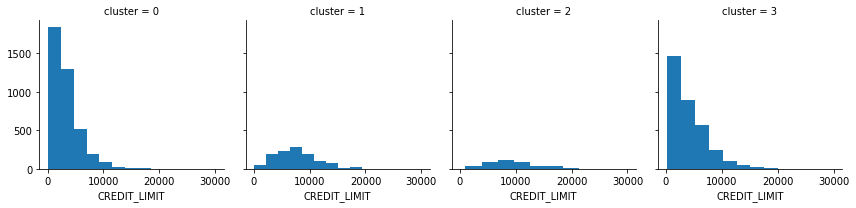

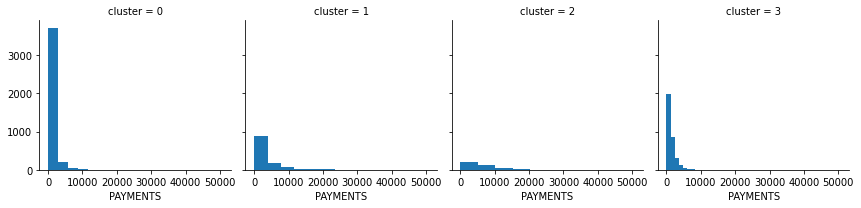

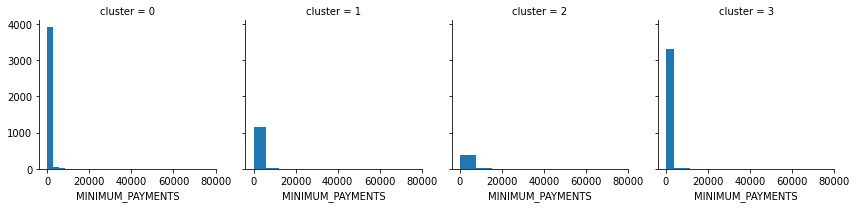

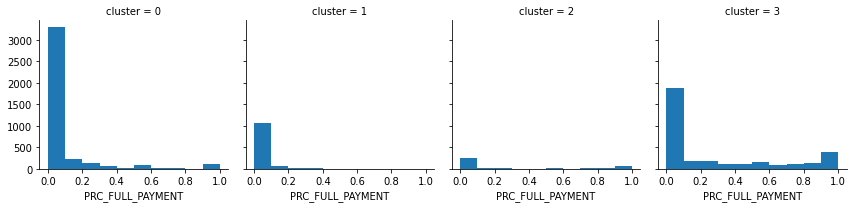

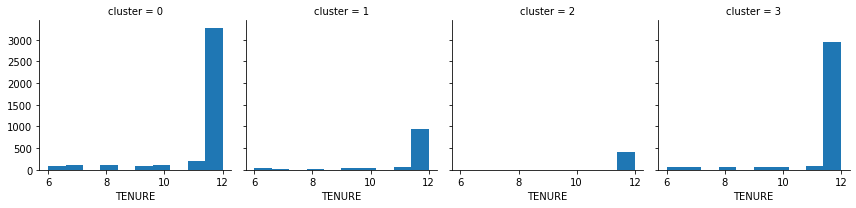

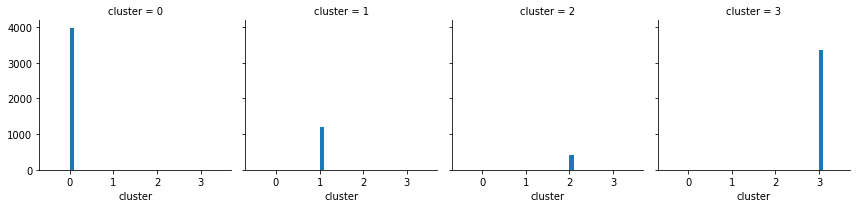

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [ ]:
clusters.groupby('cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1017.962260,0.790466,270.353529,210.187412,60.432403,600.991551,0.169950,0.086373,0.080349,0.115697,2.145974,2.906195,3280.322995,977.580010,588.124191,0.077723,11.444695
1,4621.396904,0.968488,504.475312,321.767462,182.793575,4540.928501,0.288831,0.139442,0.186409,0.485645,14.340641,7.705734,7582.002146,3497.664445,2017.516099,0.034995,11.389545
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,893.716021,0.934598,1235.360273,593.368946,642.265460,211.360936,0.885216,0.296908,0.711985,0.042495,0.789786,22.084026,4212.699006,1331.562200,649.793914,0.269328,11.595606


**PCA**



In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-1.682222,-1.076450
1,-1.138301,2.506471


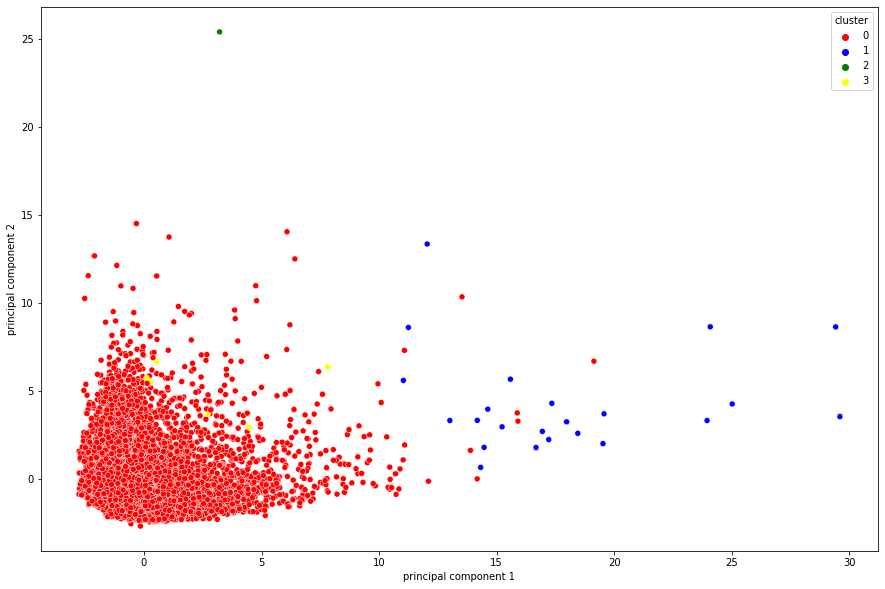

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green','yellow'])
plt.show()

*the results are nearly the same 

#  another validation metric : Silhouette Score


In [ ]:
from sklearn.metrics import  silhouette_score 
from sklearn.cluster import KMeans,AgglomerativeClustering
KMean= KMeans(n_clusters=4)
model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete")
model.fit(data_scaled)
KMean.fit(data_scaled)
label_kmeans=KMean.labels_
label_hierchical=model.labels_
print("Silhouette Score hierarchical clustering ", silhouette_score(data_scaled, label_hierchical))

print("Silhouette Score k_means clustering ", silhouette_score(data_scaled, label_kmeans))




Silhouette Score hierarchical clustering  0.7792607193799916
Silhouette Score k_means clustering  0.1976074492720698


Silhouette Score hierarchical clustering is closer to 1 that means that  clusters are well apart from each other and clearly distinguished which is not the case for k_means because the score is closer to 0 we can say that the distance between clusters is not significant.( hierarchical clustering is better) 